# Empirical analysis of performance data


Statistical tests and basic models to interpret our results !

 - Loaded the task results for study 6703ab18d345eaa4893587e0 
    (49 subjects.)
 - Loaded the task results for study 66f9aee8210357265a5958fc 
    (50 subjects.)
 - Loaded the task results for study 6703ab1a7ea30557549dc6da 
    (50 subjects.)
Total : 149 subjects
145 subjects remaining after removing problematic subjects.
A total of 33/15950 actions were missed. (0.21 %)
(145, 3)


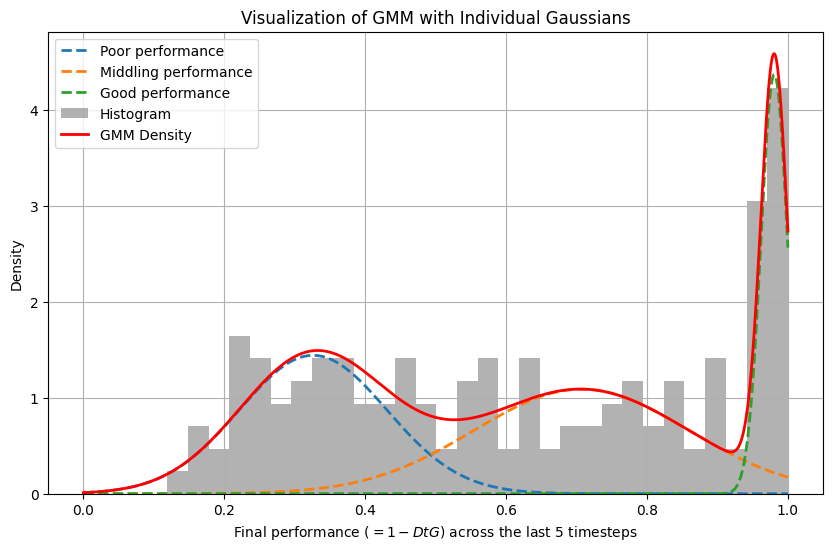

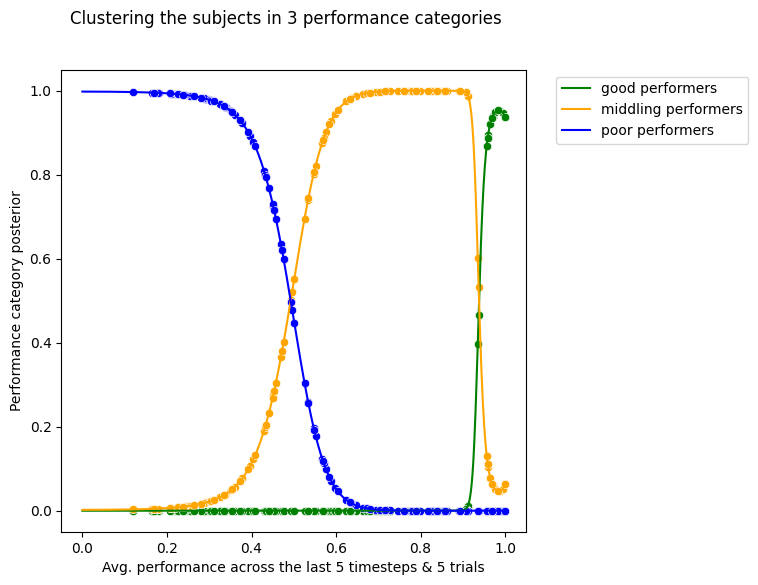

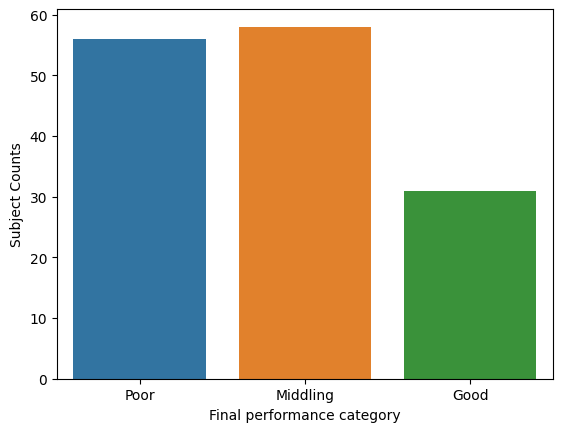

In [1]:

import sys,os
import pickle

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly as pltly
import plotly.express as px
import plotly.graph_objects as go

from sklearn.mixture import GaussianMixture

from jax import vmap
import jax.numpy as jnp

# + local functions : 
from database_handling.database_extract import get_all_subject_data_from_internal_task_id
from utils import remove_by_indices
from analysis_tools.preprocess import get_preprocessed_data_from_df
from analysis_tools.dataframe_from_raw_data import get_full_dataframe_from_raw_data

LLM_CLASSIFS_PATH = os.path.join("results","llm_classifications","29_01.data")

STUDIES_EXTRACTION_CODES = {
    # "study_1" : {
    #     "dict_code" : "002",
    #     "internal_task_id" : "002",
    #     "studies_id" : None,
    #     "exclude_subjects" : ["5c9cb670b472d0001295f377"],
    #     "feedback_noise_bins" : [0,0.2,0.4,1]
    # },
    # "study_2" : {
    #     "dict_code" : "003_1",
    #     "internal_task_id" : "003",
    #     "studies_id" :  ["66f96c31e69227986334a027","66d086503c0a69291c361b67"],
    #     "exclude_subjects" : ["615c1741d4630b25e6bc1cb9"],
    #     "feedback_noise_bins" : [0,0.05,0.15,1]
    # },
    "study_3" : {
        "dict_code" : "003_2",
        "internal_task_id" : "003",
        "studies_id" : ["6703ab18d345eaa4893587e0","66f9aee8210357265a5958fc","6703ab1a7ea30557549dc6da"],
        "exclude_subjects" : ["611d60c383f4f70ff4bc99fd", "66a74bdfdcaccdc0703894d5",
                              "667d92f2ea5c1542f417285d", "6548f570022275786186ffbd"],
        "feedback_noise_bins" : [0,0.05,0.15,1]
    }
}

LAST_T_TIMESTEPS = 5
LAST_K_TRIALS = 5
subjects_df = get_full_dataframe_from_raw_data(STUDIES_EXTRACTION_CODES,LLM_CLASSIFS_PATH,LAST_T_TIMESTEPS,LAST_K_TRIALS)

C:\Users\annic\AppData\Local\Temp\ipykernel_36352\4011521889.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(ax=axs[0],x="feedback_noise_std", y="final_performance",
C:\Users\annic\AppData\Local\Temp\ipykernel_36352\4011521889.py:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  ax = sns.violinplot(ax=axs[0],x="feedback_noise_std", y="final_performance",
C:\Users\annic\AppData\Local\Temp\ipykernel_36352\4011521889.py:7: FutureWarning: 

The `scale_hue` parameter has been replaced and will be removed in v0.15.0. Pass `common_norm=False` for the same effect.
  ax = sns.violinplot(ax=axs[0],x="feedback_noise_std", y="final_performance",
C:\Users\annic\AppData\Local\Temp\ipykernel_36352\4011521889.py:7: FutureWarning: 

The `bw` parameter i

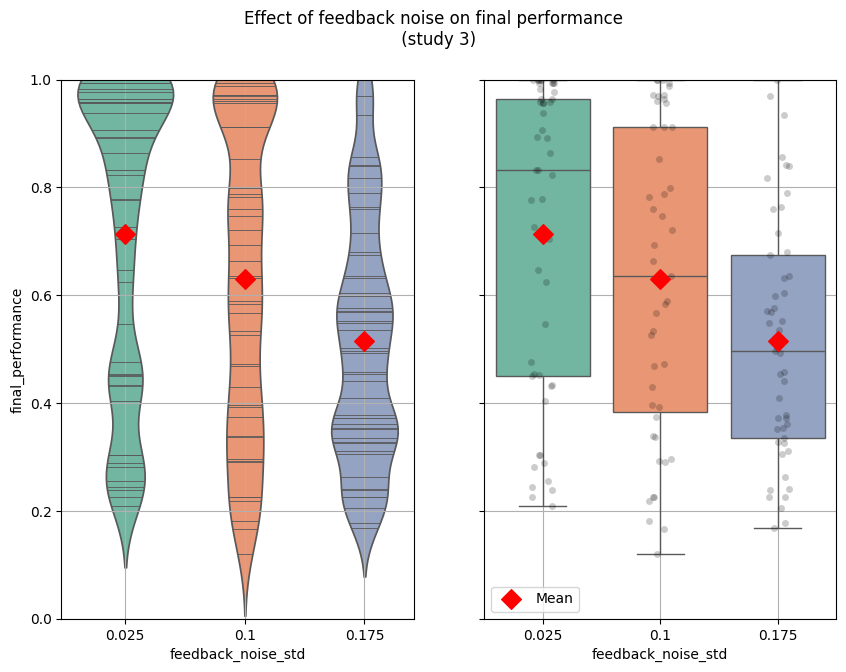

In [2]:
means = subjects_df.groupby('feedback_noise_std')['final_performance'].mean()
# print(subjects_df["performance"])


fig,axs = plt.subplots(1,2,sharey=True,figsize = (10,7))
fig.suptitle("Effect of feedback noise on final performance \n (study 3)")
ax = sns.violinplot(ax=axs[0],x="feedback_noise_std", y="final_performance",
                    data=subjects_df, palette="Set2",
                    scale="area", inner="stick",
                    scale_hue=True, bw=.2)
ax.scatter(np.arange(len(means)), means, color='red', label='Mean', zorder=5, s=100, marker='D')

ax = sns.boxplot(ax=axs[1],x="feedback_noise_std", y="final_performance",
                    data=subjects_df, palette="Set2")

# Adjust zorder and label
ax.scatter(np.arange(len(means)), means, color='red', label='Mean', zorder=5, s=100, marker='D')
# Adding a legend to label the means
ax.legend()

# add stripplot to boxplot with Seaborn
sns.stripplot(ax = axs[1], y='final_performance', x='feedback_noise_std', 
                   data=subjects_df, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.2,
                   color='black')

for ax in axs :
    ax.grid()
    ax.set_ylim([0,1])


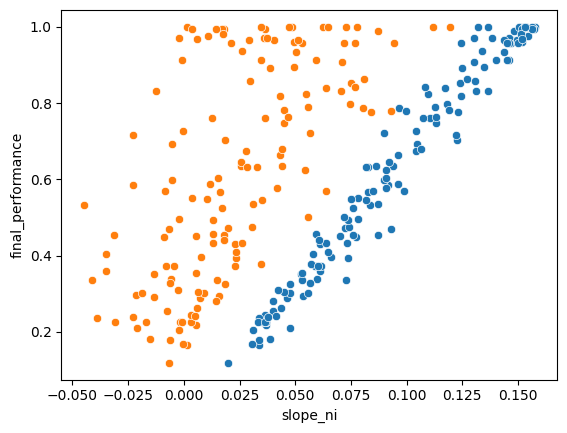

                   subject_id                     task_code lang  browser  \
0    65b90328586c915db8b1c1be  003+6703ab18d345eaa4893587e0   en   OPERA    
1    6036c14ba255f8279fd49cf8  003+6703ab18d345eaa4893587e0   en  CHROME    
2    5ea85c32f6c5950aa4c568f3  003+6703ab18d345eaa4893587e0   en  CHROME    
3    65a07f2b1a16a3bf7b8db2e1  003+6703ab18d345eaa4893587e0   en  CHROME    
4    66856c1eacf5c42257f95c63  003+6703ab18d345eaa4893587e0   en  CHROME    
..                        ...                           ...  ...      ...   
140  64e76ad4ce316de314ca559b  003+6703ab1a7ea30557549dc6da   en  CHROME    
141  66b62528d79895cc008e8e3b  003+6703ab1a7ea30557549dc6da   en  CHROME    
142  66b38624283af88b5fb39daa  003+6703ab1a7ea30557549dc6da   en  CHROME    
143  6697c2177d987a6d52b2b964  003+6703ab1a7ea30557549dc6da   en  CHROME    
144  665e8784960919e34257696d  003+6703ab1a7ea30557549dc6da   en  CHROME    

     N_trials  N_tmstps                  start_date  \
0          11       

c:\Users\annic\OneDrive\Bureau\MainPhD\code\behavioural_exp_code\exploit_results_env\lib\site-packages\scipy\stats\_stats_py.py:10917: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
c:\Users\annic\OneDrive\Bureau\MainPhD\code\behavioural_exp_code\exploit_results_env\lib\site-packages\scipy\stats\_stats_py.py:10931: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
c:\Users\annic\OneDrive\Bureau\MainPhD\code\behavioural_exp_code\exploit_results_env\lib\site-packages\scipy\stats\_stats_py.py:10934: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


                 Generalized Linear Model Regression Results                  
Dep. Variable:               logit_fp   No. Observations:                  145
Model:                            GLM   Df Residuals:                      140
Model Family:                Gaussian   Df Model:                            4
Link Function:               Identity   Scale:                          9.1049
Method:                          IRLS   Log-Likelihood:                -363.34
Date:                Wed, 19 Feb 2025   Deviance:                       1274.7
Time:                        18:35:25   Pearson chi2:                 1.27e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1439
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

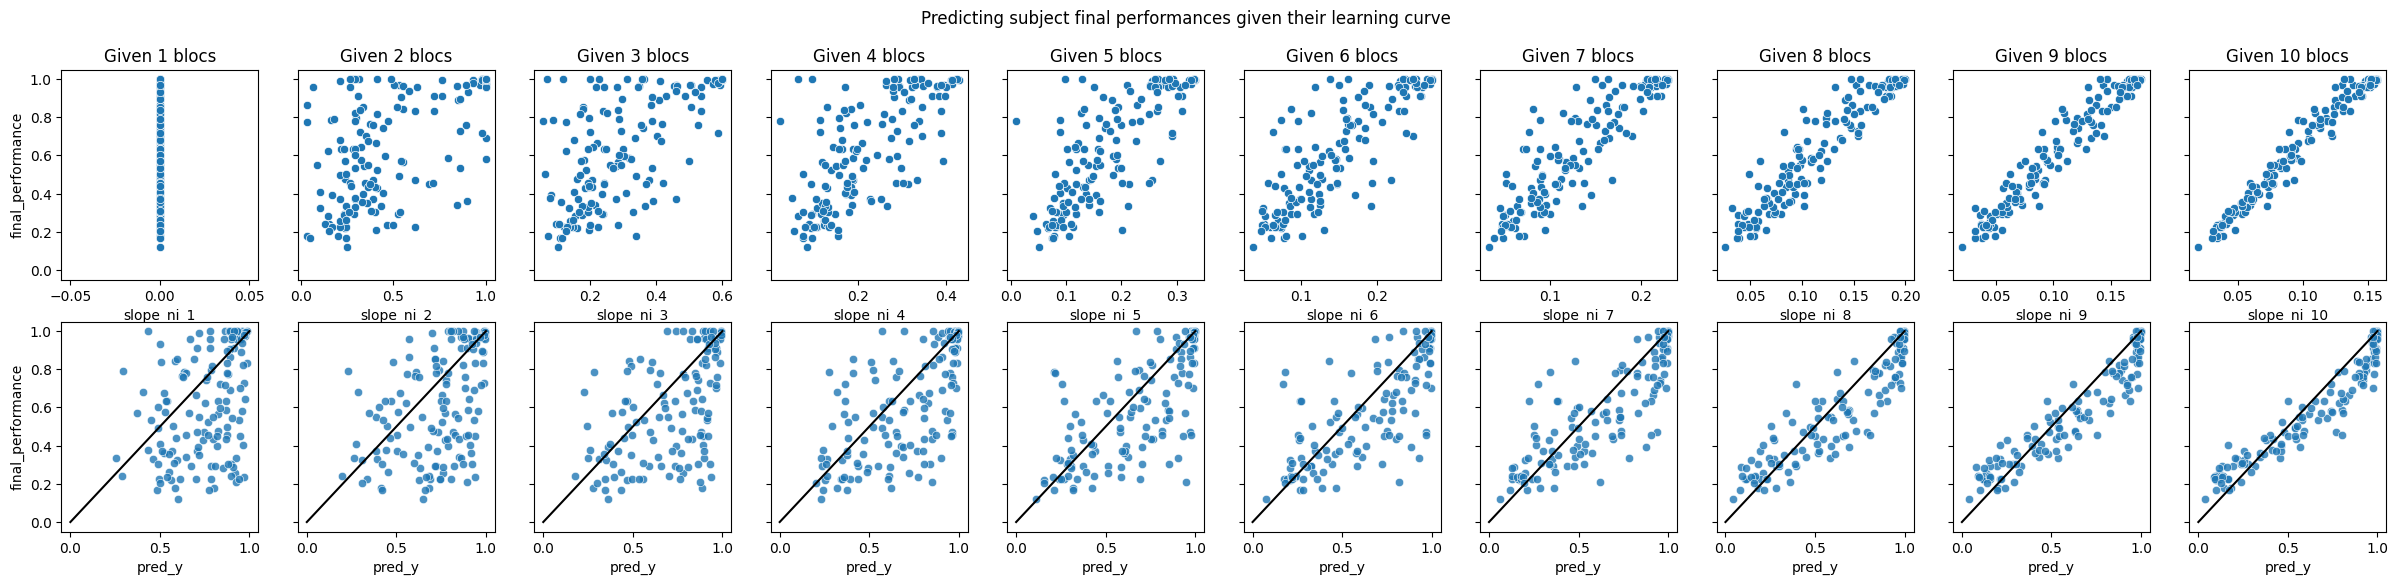

In [225]:
# Another way of qualifying learners vs non learners : slope !
from scipy.stats import linregress
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
from scipy import stats

modified_df = subjects_df.copy()


modified_df['fp_clip'] = modified_df['final_performance'].clip(1e-5, 1 - 1e-5)
modified_df['logit_fp'] = np.log(modified_df['fp_clip'] / (1 - modified_df['fp_clip']))

def calculate_regression(x, y,label = None):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    if label is None :
        return pd.Series({
            'slope': slope,
            'intercept': intercept,
            'r_squared': r_value ** 2
        })
    else :
        return pd.Series({
            'slope_{}'.format(label): slope,
            'intercept_{}'.format(label): intercept,
            'r_squared_{}'.format(label): r_value ** 2
        })

def calculate_regression_no_intercept(x, y,label = None):
    # Fit a model without adding a constant (intercept is implicitly 0)
    model = sm.OLS(y, x).fit()
    if label is None :
        return pd.Series({
            'slope_ni': model.params[0],
            'r_squared': model.rsquared
        })
    else :            
        return pd.Series({
            'slope_ni_{}'.format(label): model.params[0],
            'r_squared_ni_{}'.format(label): model.rsquared
        })
    
modified_df["final_trial_performance"] = modified_df["norm_distance_to_goal"].apply(lambda x : list(np.mean(1.0 -x[:-1,-LAST_T_TIMESTEPS:],-1))) 
df_regression = modified_df.apply(lambda row: calculate_regression(np.arange(10), row['final_trial_performance']), axis=1)
df_regression_no_intercept = modified_df.apply(lambda row: calculate_regression_no_intercept(np.arange(10), row['final_trial_performance']), axis=1)
all_regression_results = pd.concat([df_regression,df_regression_no_intercept],axis=1)
modified_df = pd.concat([modified_df,all_regression_results],axis=1)

sns.scatterplot(data = modified_df, x = 'slope_ni' , y="final_performance")
sns.scatterplot(data = modified_df, x = 'slope' , y="final_performance")
plt.show()

# The final slope (with 0 intercept) is a great predictor for the final performance of the subject
# The results are more mixed with a non-zero intercept.


print(modified_df)
# Can we predict using the initial slope provided by the first T trials ?
Nt = 10

fig,axs = plt.subplots(2,Nt,figsize=(Nt*3,3*2),sharey=True)
fig.suptitle("Predicting subject final performances given their learning curve")
for k in range(Nt):
    axcolumn = axs[:,k]
    T = k+1
    
    column_name = "predict_given_{}_trials".format(T)
    
    axcolumn[0].set_title("Given {} blocs".format(T))
    
    print(column_name)
    
    
    modified_df[column_name] = modified_df["norm_distance_to_goal"].apply(lambda x : list(np.mean(1.0 -x[:T,-LAST_T_TIMESTEPS:],-1))) 
    df_regression = modified_df.apply(lambda row: calculate_regression(np.arange(T), row[column_name],T), axis=1)
    df_regression_no_intercept = modified_df.apply(lambda row: calculate_regression_no_intercept(np.arange(T), row[column_name],T), axis=1)
    all_regression_results = pd.concat([df_regression,df_regression_no_intercept],axis=1)
    modified_df = pd.concat([modified_df,all_regression_results],axis=1)
    sns.scatterplot(ax = axcolumn[0],data = modified_df, x = 'slope_ni_{}'.format(T) , y="final_performance")
    
    
    
    model = smf.glm(formula='logit_fp ~ Age + C(noise_category) + slope_ni_{} + initial_performance +  C(noise_category)*slope_ni_{}'.format(T,T), data=modified_df, family=sm.families.Gaussian())
    result = model.fit()
    print(result.summary())
    
    modified_df['pred_logit'] = result.predict(modified_df)
    modified_df['pred_y'] = 1 / (1 + np.exp(-modified_df['pred_logit']))
    sns.scatterplot(ax=axcolumn[1],data = modified_df,x="pred_y",y="final_performance",alpha=0.8)
    axcolumn[1].plot(np.linspace(0,1,100),(np.linspace(0,1,100)),color="black")


    
    
    # sns.scatterplot(ax = ax,data = modified_df, x = 'slope_{}'.format(T) , y="final_performance")
plt.show()






# fig, ax = plt.subplots()
# ax.scatter(yhat, y)
# line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
# abline_plot(model_results=line_fit, ax=ax)
# ax.set_title('Model Fit Plot (log space)')
# ax.set_ylabel('Observed values')
# ax.set_xlabel('Fitted values');
# plt.show()


# fig, ax = plt.subplots()
# ax.scatter(yhat, result.resid_pearson)
# ax.hlines(0, 0, 1)
# ax.set_xlim(0, 1)
# ax.set_title('Residual Dependence Plot')
# ax.set_ylabel('Pearson Residuals')
# ax.set_xlabel('Fitted values')
# plt.show()



# fig, ax = plt.subplots()
# resid = result.resid_deviance.copy()
# resid_std = stats.zscore(resid)
# ax.hist(resid_std, bins=25)
# ax.set_title('Histogram of standardized deviance residuals');
# plt.show()


# from statsmodels import graphics
# graphics.gofplots.qqplot(resid, line='r')
# plt.show()









Low ShapiroResult(statistic=np.float64(0.836709872223554), pvalue=np.float64(8.22079668883915e-06))
Medium ShapiroResult(statistic=np.float64(0.9186302334617771), pvalue=np.float64(0.0029946751298851808))
High ShapiroResult(statistic=np.float64(0.9585700611436629), pvalue=np.float64(0.08272670195784596))


C:\Users\annic\AppData\Local\Temp\ipykernel_36352\867450432.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_perfs_by_group = list(subjects_df.groupby('noise_category')['final_performance'])


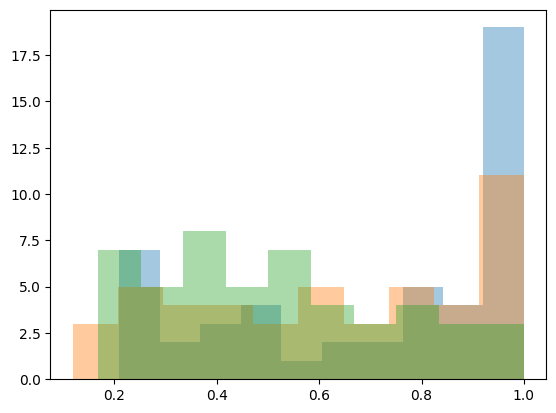

In [21]:
from scipy.stats import shapiro

# Plotting and difference testing for study 3 :

# FInal performance : differences between experimental groups :
final_perfs_by_group = list(subjects_df.groupby('noise_category')['final_performance'])       
final_perfs_by_group_dict = {cat:np.array(perfs) for (cat,perfs) in final_perfs_by_group}                      


# The data have not been generated by a normal distribution ! 
for noise_category,subject_array in  final_perfs_by_group_dict.items():
    normality = shapiro(subject_array)
    print(noise_category,normality)
    plt.hist(subject_array,10,alpha=0.4)

The data have not been generated by a normal distribution ! 

To make between group comparisons, we need to use an alternative test like the Kriska Wallis test (compare all 3 conditions at once) or a pairwise test such as the Mann-Whitney U Test or Dunn's Test. (Post Hoc)

In [4]:
from scipy.stats import kruskal

# FInal performance : differences between experimental groups :
final_perfs_by_group = list(subjects_df.groupby('noise_category')['final_performance'])       
final_perfs_by_group_dict = {cat:np.array(perfs) for (cat,perfs) in final_perfs_by_group}    

h_stat, p_value = kruskal(final_perfs_by_group_dict["Low"],final_perfs_by_group_dict["Medium"],final_perfs_by_group_dict["High"],'raise')

print("Kruskal Wallis test :")
print(f"H-statistic: {h_stat}, p-value: {p_value}")



# Post hoc test with Dunn's test :
# Using the posthoc_dunn() function
import scikit_posthocs as sp
p_values = sp.posthoc_dunn([final_perfs_by_group_dict["Low"],final_perfs_by_group_dict["Medium"],final_perfs_by_group_dict["High"]], p_adjust = 'bonferroni')

print("\nPost-hoc Dunn's test :")
print(p_values)

Kruskal Wallis test :
H-statistic: 14.914575441075698, p-value: 0.001891124551787885

Post-hoc Dunn's test :
          1         2         3
1  1.000000  0.422562  0.001562
2  0.422562  1.000000  0.149652
3  0.001562  0.149652  1.000000


C:\Users\annic\AppData\Local\Temp\ipykernel_36352\3656515678.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_perfs_by_group = list(subjects_df.groupby('noise_category')['final_performance'])


There is no significant differences between Low and Medium or Medium and Low noises. The only significant group difference is between Low and High noises ($p<0.01$)


Same process for initial trials : 


In [8]:
from scipy.stats import kruskal

# FInal performance : differences between experimental groups :
init_perfs_by_group = list(subjects_df.groupby('noise_category')['initial_performance'])       
init_perfs_by_group_dict = {cat:np.array(perfs) for (cat,perfs) in init_perfs_by_group}    

h_stat, p_value = kruskal(init_perfs_by_group_dict["Low"],init_perfs_by_group_dict["Medium"],init_perfs_by_group_dict["High"],'raise')

print("Kruskal Wallis test :")
print(f"H-statistic: {h_stat}, p-value: {p_value}")



Kruskal Wallis test :
H-statistic: 3.013283991169702, p-value: 0.3895815773309885


C:\Users\annic\AppData\Local\Temp\ipykernel_36352\2207213744.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  init_perfs_by_group = list(subjects_df.groupby('noise_category')['initial_performance'])


No significant diffferences between conditions at training start, indicating that the learning led to significant differences between the (initially similar subjects).

Finally, for the blind trial :

In [9]:
from scipy.stats import kruskal

# FInal performance : differences between experimental groups :
blind_perfs_by_group = list(subjects_df.groupby('noise_category')['blind_trial_performance'])       
blind_perfs_by_group_dict = {cat:np.array(perfs) for (cat,perfs) in blind_perfs_by_group}    

h_stat, p_value = kruskal(blind_perfs_by_group_dict["Low"],blind_perfs_by_group_dict["Medium"],blind_perfs_by_group_dict["High"],'raise')

print("Kruskal Wallis test :")
print(f"H-statistic: {h_stat}, p-value: {p_value}")



# Post hoc test with Dunn's test :
# Using the posthoc_dunn() function
import scikit_posthocs as sp
p_values = sp.posthoc_dunn([blind_perfs_by_group_dict["Low"],blind_perfs_by_group_dict["Medium"],blind_perfs_by_group_dict["High"]], p_adjust = 'bonferroni')

print("\nPost-hoc Dunn's test :")
print(p_values)

Kruskal Wallis test :
H-statistic: 11.882379733183168, p-value: 0.007797132782266693

Post-hoc Dunn's test :
          1         2         3
1  1.000000  0.641702  0.008509
2  0.641702  1.000000  0.261360
3  0.008509  0.261360  1.000000


C:\Users\annic\AppData\Local\Temp\ipykernel_36352\1568926586.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  blind_perfs_by_group = list(subjects_df.groupby('noise_category')['blind_trial_performance'])


The results confirm the data for the 'final performance' data !


## GLMs to characterize learning curves :




Index(['subject_id', 'task_code', 'lang', 'browser', 'N_trials', 'N_tmstps',
       'start_date', 'finish_date', 'finished_clock', 'completedTask',
       'N_exited_fullscreen', 'N_missed_actions', 'canvas_explore_points',
       'mandatory_q1', 'mandatory_q2', 'optional_q1', 'optional_q2',
       'optional_q3', 'canvas_size', 'Submission id', 'Participant id',
       'Status', 'Custom study tncs accepted at', 'Started at', 'Completed at',
       'Reviewed at', 'Archived at', 'Time taken', 'Completion code',
       'Total approvals', 'Fluent languages', 'Age', 'Sex',
       'Ethnicity simplified', 'Country of birth', 'Country of residence',
       'Nationality', 'Language', 'Student status', 'Employment status',
       'Nationality_red', 'feedback_noise_std',
       'application_measured_timetaken', 'question_0', 'question_1',
       'question_2', 'question_3', 'question_4', 'question_5',
       'raw_feedback_values', 'realtime_values', 'grid_layout',
       'subject_positions', 'goal_

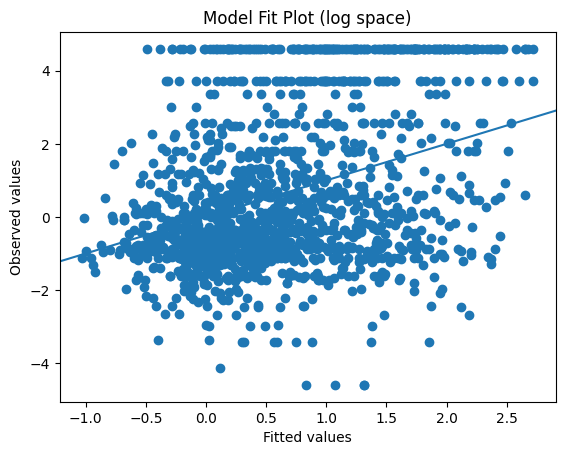

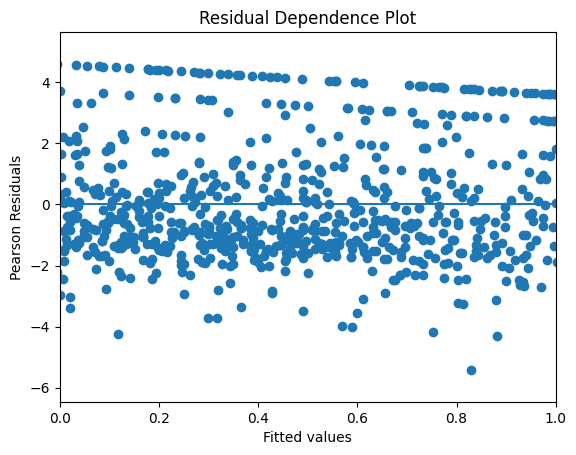

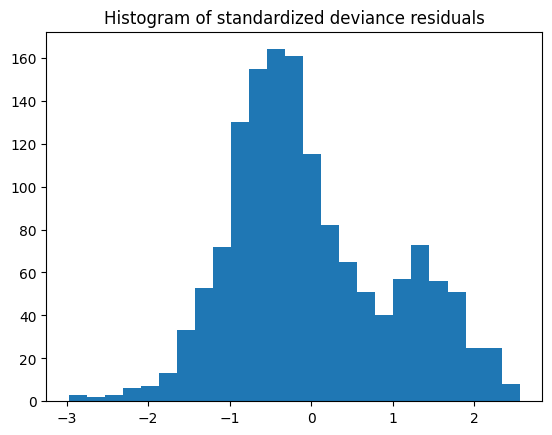

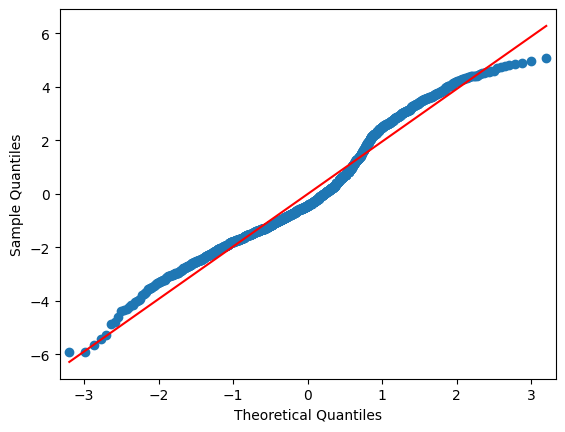

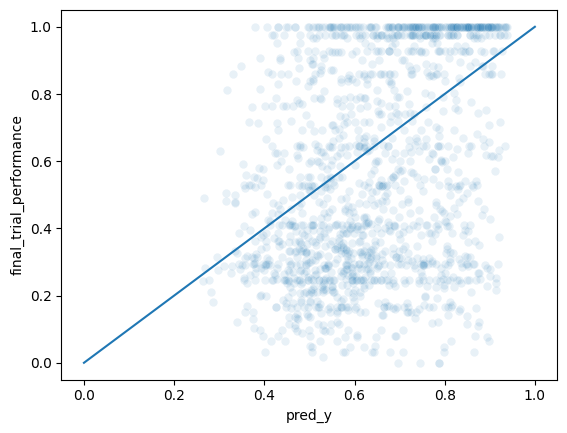

In [227]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot


modified_df = subjects_df.copy()

modified_df["final_trial_performance"] = modified_df["norm_distance_to_goal"].apply(lambda x : list(np.mean(1.0 -x[:-1,-LAST_T_TIMESTEPS:],-1)))
modified_df["trial"] = modified_df['final_trial_performance'].apply(lambda a: list(range(len(a))))


df_exploded = modified_df.explode(['final_trial_performance',"trial"])
df_exploded['final_trial_performance'] = (df_exploded['final_trial_performance']).astype(float)
df_exploded['trial'] = pd.to_numeric(df_exploded['trial'], errors='raise')
df_exploded["approvals"] = df_exploded["Total approvals"]

print(df_exploded.columns)



df_exploded['ftp_clip'] = df_exploded['final_trial_performance'].clip(1e-2, 1 - 1e-2)
df_exploded['logit_ftp'] = np.log(df_exploded['ftp_clip'] / (1 - df_exploded['ftp_clip']))

# Adding this makes the GLM better but it's probably cheating :p :
# + C(performance_category) + C(performance_category)*trial
model = smf.glm(formula='logit_ftp ~ trial + C(noise_category) +  Age + trial*C(noise_category) + trial*Age + C(Sex)', data=df_exploded, family=sm.families.Gaussian())
result = model.fit()
# Print summary of the model
print(result.summary())


print('Parameters  :\n', result.params)
print('T-values:\n', result.tvalues)


y = df_exploded['logit_ftp']
yhat = result.mu


fig, ax = plt.subplots()
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)
ax.set_title('Model Fit Plot (log space)')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');
plt.show()


fig, ax = plt.subplots()
ax.scatter(yhat, result.resid_pearson)
ax.hlines(0, 0, 1)
ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')
plt.show()

from scipy import stats

fig, ax = plt.subplots()
resid = result.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histogram of standardized deviance residuals');
plt.show()


from statsmodels import graphics
graphics.gofplots.qqplot(resid, line='r')
plt.show()





df_exploded['pred_logit'] = result.predict(df_exploded)
df_exploded['pred_y'] = 1 / (1 + np.exp(-df_exploded['pred_logit']))

sns.scatterplot(data = df_exploded,x="pred_y",y="final_trial_performance",alpha=0.1)
plt.plot(np.linspace(0,1,100),(np.linspace(0,1,100)))

This is not really a great success,  the fitting seems of quite poor quality.

Maybe we'll have better results trying to predict final performances from initial elements !

                 Generalized Linear Model Regression Results                  
Dep. Variable:               logit_fp   No. Observations:                  145
Model:                            GLM   Df Residuals:                      136
Model Family:                Gaussian   Df Model:                            8
Link Function:               Identity   Scale:                          8.9752
Method:                          IRLS   Log-Likelihood:                -360.20
Date:                Wed, 19 Feb 2025   Deviance:                       1220.6
Time:                        16:54:08   Pearson chi2:                 1.22e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1817
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

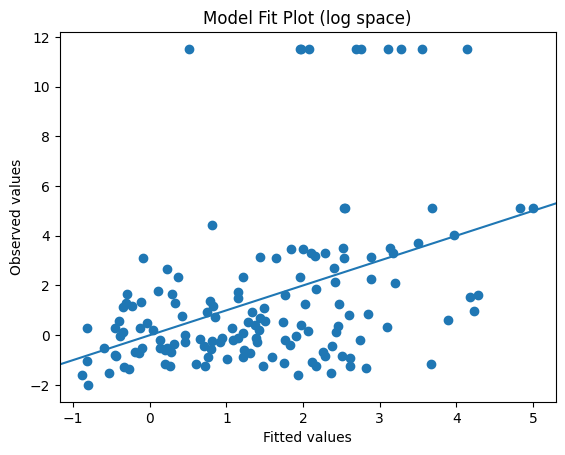

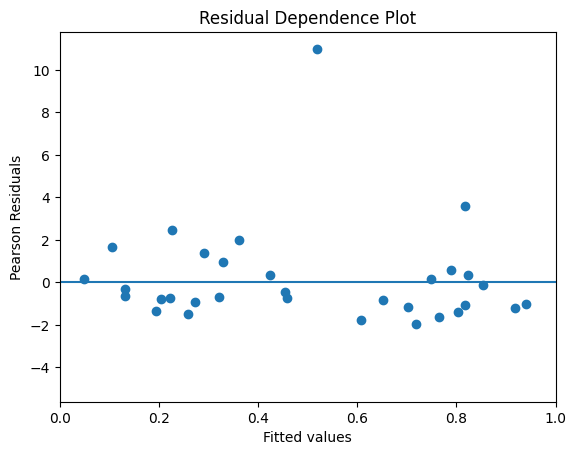

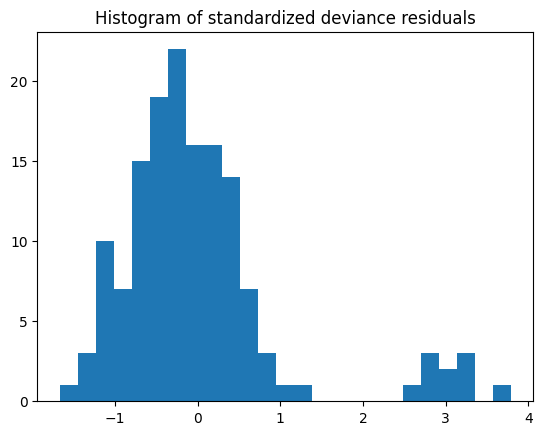

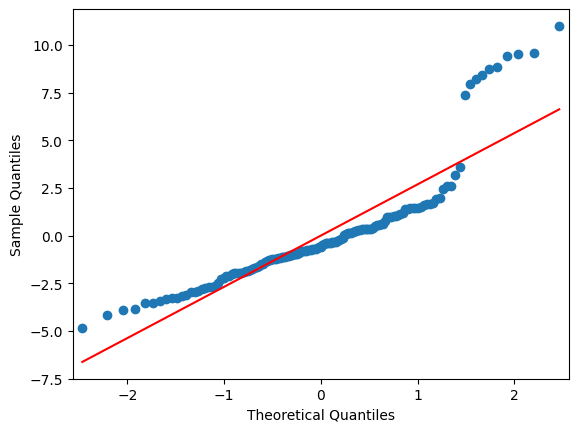

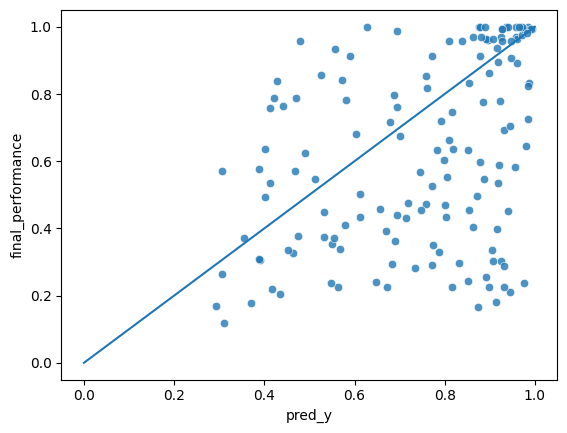

In [ ]:
modified_df = subjects_df.copy()

# modified_df['initial_performance'] = 
# modified_df["final_trial_performance"] = modified_df["norm_distance_to_goal"].apply(lambda x : list(np.mean(1.0 -x[:-1,-LAST_T_TIMESTEPS:],-1)))

modified_df['fp_clip'] = modified_df['final_performance'].clip(1e-5, 1 - 1e-5)
modified_df['logit_fp'] = np.log(modified_df['fp_clip'] / (1 - modified_df['fp_clip']))

# Adding this makes the GLM better but it's probably cheating :p :
# + C(performance_category) + C(performance_category)*trial
model = smf.glm(formula='logit_fp ~ Age + C(noise_category) + C(Sex) + Age*C(noise_category) + initial_performance ', data=modified_df, family=sm.families.Gaussian())
result = model.fit()
# Print summary of the model
print(result.summary())


print('Parameters  :\n', result.params)
print('T-values:\n', result.tvalues)


y = modified_df['logit_fp']
yhat = result.mu


fig, ax = plt.subplots()
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)
ax.set_title('Model Fit Plot (log space)')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');
plt.show()


fig, ax = plt.subplots()
ax.scatter(yhat, result.resid_pearson)
ax.hlines(0, 0, 1)
ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')
plt.show()

from scipy import stats

fig, ax = plt.subplots()
resid = result.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histogram of standardized deviance residuals');
plt.show()


from statsmodels import graphics
graphics.gofplots.qqplot(resid, line='r')
plt.show()





modified_df['pred_logit'] = result.predict(modified_df)
modified_df['pred_y'] = 1 / (1 + np.exp(-modified_df['pred_logit']))

sns.scatterplot(data = modified_df,x="pred_y",y="final_performance",alpha=0.8)
plt.plot(np.linspace(0,1,100),(np.linspace(0,1,100)))




(145, 11, 10)
(145, 11, 10)


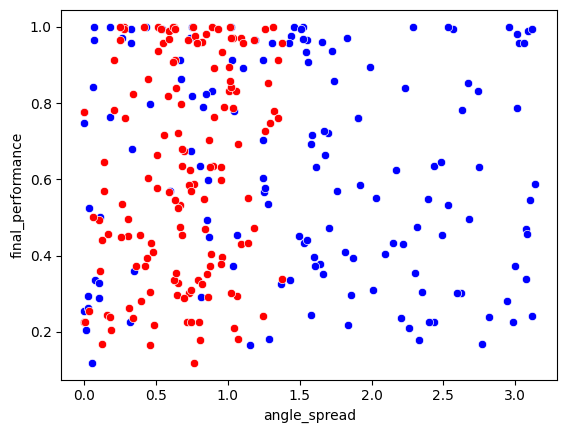

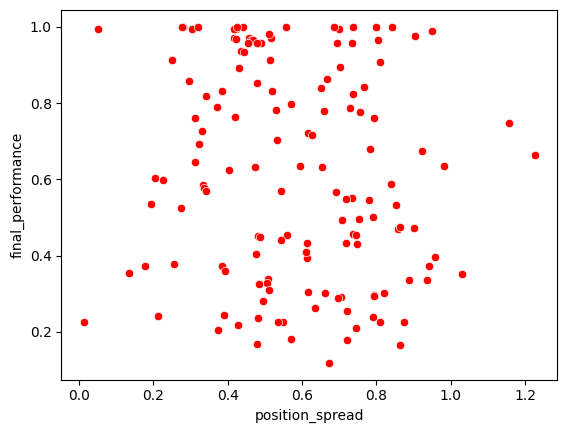

                 Generalized Linear Model Regression Results                  
Dep. Variable:               logit_fp   No. Observations:                  145
Model:                            GLM   Df Residuals:                      137
Model Family:                Gaussian   Df Model:                            7
Link Function:               Identity   Scale:                          9.2714
Method:                          IRLS   Log-Likelihood:                -363.08
Date:                Wed, 19 Feb 2025   Deviance:                       1270.2
Time:                        17:44:57   Pearson chi2:                 1.27e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1452
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

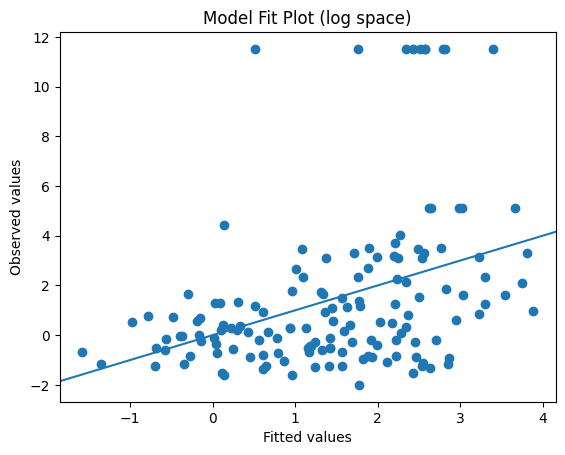

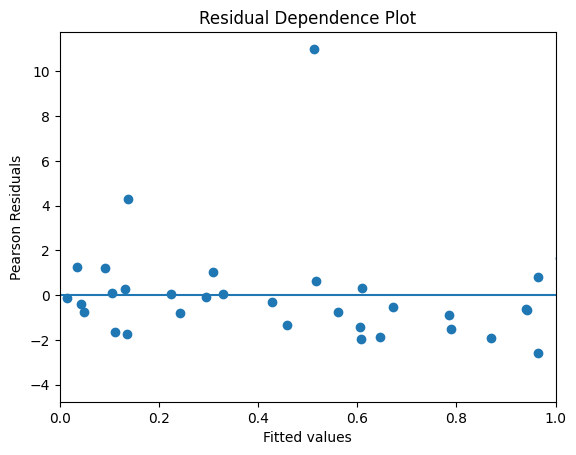

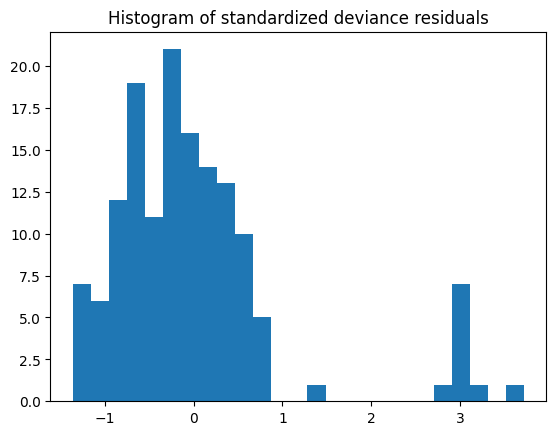

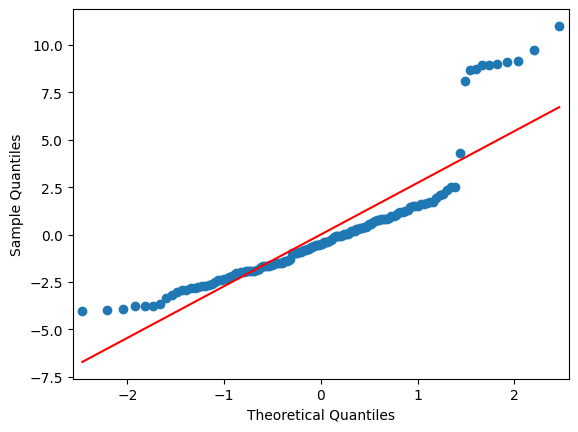

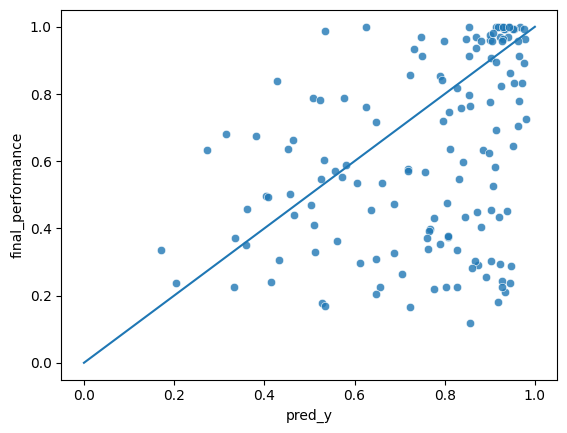

In [176]:
# Additionnal predictors : 
from scipy.stats import gaussian_kde
from scipy.spatial.distance import pdist
 
modified_df = subjects_df.copy()

def estimate_spread(data):
    
    
    if data.ndim==2 :
        return np.max(pdist(data))

    max_spread = np.max(data,axis=0) - np.min(data,axis=0)
    if max_spread > 3.1415 :
        max_spread =  - max_spread + 3.1415
    return np.abs(max_spread)

print(np.stack(modified_df["action_angles"]).shape)
print(np.stack(modified_df["action_time_between_points"]).shape)

all_angles = np.stack(modified_df["action_barycenters"])
all_distances = np.stack(modified_df["action_distances"])
all_positions = np.stack(modified_df["action_barycenters"])

modified_df["angle_spread"] = modified_df["action_angles"].apply(lambda x : estimate_spread(x[0,:]))
modified_df["distance_spread"] = modified_df["action_distances"].apply(lambda x : estimate_spread(x[0,:]))
modified_df["position_spread"] = modified_df["action_barycenters"].apply(lambda x : estimate_spread(x[0,...]))

sns.scatterplot(data = modified_df,x = "angle_spread", y ="final_performance",color="blue")
sns.scatterplot(data = modified_df,x = "distance_spread", y ="final_performance",color="red")
plt.show()

sns.scatterplot(data = modified_df,x = "position_spread", y ="final_performance",color="red")
plt.show()



modified_df['fp_clip'] = modified_df['final_performance'].clip(1e-5, 1 - 1e-5)
modified_df['logit_fp'] = np.log(modified_df['fp_clip'] / (1 - modified_df['fp_clip']))

# Adding this makes the GLM better but it's probably cheating :p :
# + C(performance_category) + C(performance_category)*trial
model = smf.glm(formula='logit_fp ~ Age + C(noise_category) + angle_spread + distance_spread + position_spread + angle_spread*distance_spread', data=modified_df, family=sm.families.Gaussian())
result = model.fit()
# Print summary of the model
print(result.summary())


print('Parameters  :\n', result.params)
print('T-values:\n', result.tvalues)


y = modified_df['logit_fp']
yhat = result.mu


fig, ax = plt.subplots()
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)
ax.set_title('Model Fit Plot (log space)')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');
plt.show()


fig, ax = plt.subplots()
ax.scatter(yhat, result.resid_pearson)
ax.hlines(0, 0, 1)
ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')
plt.show()

from scipy import stats

fig, ax = plt.subplots()
resid = result.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histogram of standardized deviance residuals');
plt.show()


from statsmodels import graphics
graphics.gofplots.qqplot(resid, line='r')
plt.show()





modified_df['pred_logit'] = result.predict(modified_df)
modified_df['pred_y'] = 1 / (1 + np.exp(-modified_df['pred_logit']))

sns.scatterplot(data = modified_df,x="pred_y",y="final_performance",alpha=0.8)
plt.plot(np.linspace(0,1,100),(np.linspace(0,1,100)))
